In [1]:
%pylab inline
from richLowCost_copy import * 
Vgrid = np.load("richLow.npy")
matplotlib.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 15})

Populating the interactive namespace from numpy and matplotlib


In [3]:
num = 10000
'''
    x = [w,n,m,s,e,o,z]
    x = [5,0,0,0,0,0,0]
'''

from jax import random

def simulation(key):
    initE = random.choice(a = nE, p=E_distribution, key = key)
    initS = random.choice(a = nS, p=S_distribution, key = key)
    x = [5, 0, 0, initS, initE, 0, 0]
    path = []
    move = []
    for t in range(T_min, T_max):
        _, key = random.split(key)
        if t == T_max-1:
            _,a = V(t,Vgrid[:,:,:,:,:,:,:,t],x)
        else:
            _,a = V(t,Vgrid[:,:,:,:,:,:,:,t+1],x)
        xp = transition(t,a.reshape((1,-1)),x)
        p = xp[:,-1]
        x_next = xp[:,:-1]
        path.append(x)
        move.append(a)
        x = x_next[random.choice(a = nS*nE, p=p, key = key)]
    path.append(x)
    return jnp.array(path), jnp.array(move)

In [4]:
%%time
# simulation part 
keys = vmap(random.PRNGKey)(jnp.arange(num))
Paths, Moves = vmap(simulation)(keys)

CPU times: user 9h 59min 42s, sys: 52min 11s, total: 10h 51min 54s
Wall time: 28min 50s


In [5]:
# x = [w,n,m,s,e,o,z]
# x = [0,1,2,3,4,5,6]
ws = Paths[:,:,0].T
ns = Paths[:,:,1].T
ms = Paths[:,:,2].T
ss = Paths[:,:,3].T
es = Paths[:,:,4].T
os = Paths[:,:,5].T
zs = Paths[:,:,6].T
cs = Moves[:,:,0].T
bs = Moves[:,:,1].T
ks = Moves[:,:,2].T
hs = Moves[:,:,3].T
actions = Moves[:,:,4].T

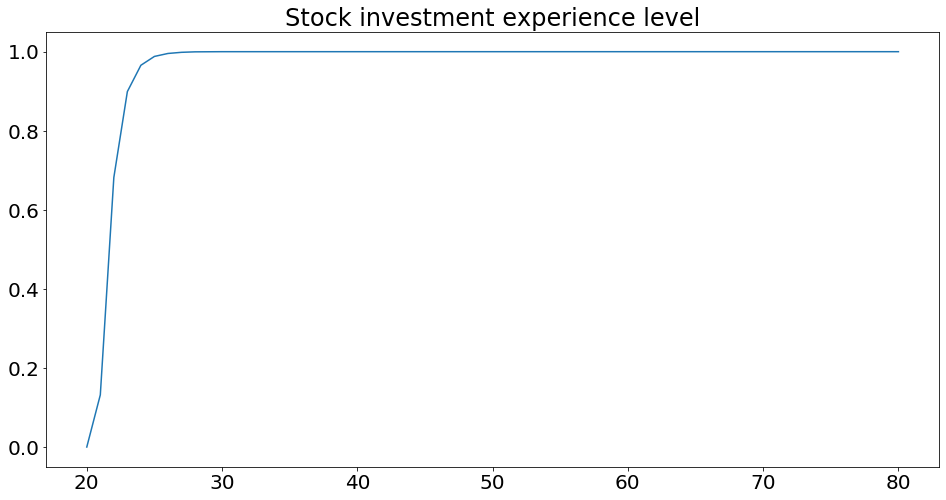

In [105]:
plt.title("Stock investment experience level")
plt.plot(range(20, T_max + 21),jnp.mean(zs,axis = 1), label = "experience")
plt.savefig("stockExperience")

In [135]:
print(pd.DataFrame(np.array([range(20,31),zs.sum(axis = 1)[:11]], dtype = int).T,columns=['age', 'number']).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  age &  number \\
\midrule
0  &   20 &       0 \\
1  &   21 &    1319 \\
2  &   22 &    6818 \\
3  &   23 &    8991 \\
4  &   24 &    9657 \\
5  &   25 &    9880 \\
6  &   26 &    9955 \\
7  &   27 &    9984 \\
8  &   28 &    9996 \\
9  &   29 &    9998 \\
10 &   30 &   10000 \\
\bottomrule
\end{tabular}



In [118]:
zs.sum(axis = 1)[:30]

DeviceArray([    0.,  1319.,  6818.,  8991.,  9657.,  9880.,  9955.,
              9984.,  9996.,  9998., 10000., 10000., 10000., 10000.,
             10000., 10000., 10000., 10000., 10000., 10000., 10000.,
             10000., 10000., 10000., 10000., 10000., 10000., 10000.,
             10000., 10000.], dtype=float32)

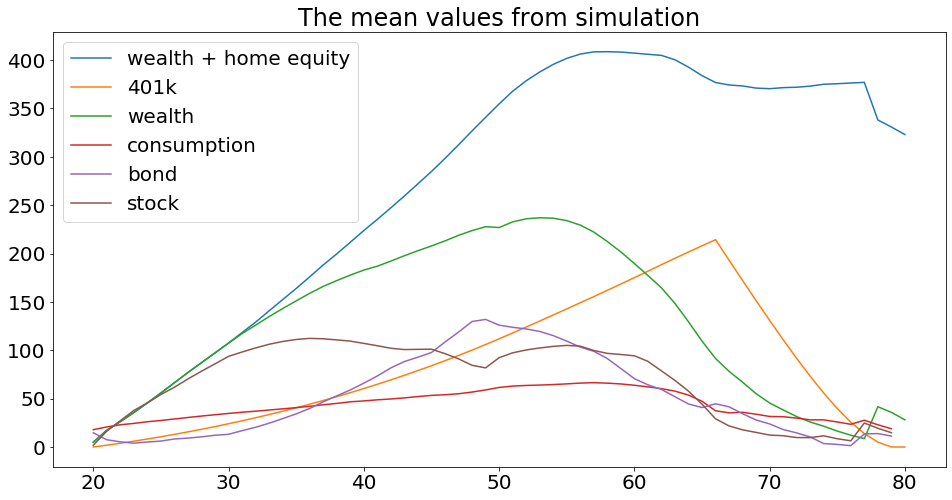

In [106]:
plt.title("The mean values from simulation")
plt.plot(range(20, T_max + 21),jnp.mean(ws + H*pt*os - ms,axis = 1), label = "wealth + home equity")
plt.plot(range(20, T_max + 21),jnp.mean(ns,axis = 1), label = "401k")
plt.plot(range(20, T_max + 21),jnp.mean(ws,axis = 1), label = "wealth")
plt.plot(range(20, T_max + 20),jnp.mean(cs,axis = 1), label = "consumption")
plt.plot(range(20, T_max + 20),jnp.mean(bs,axis = 1), label = "bond")
plt.plot(range(20, T_max + 20),jnp.mean(ks,axis = 1), label = "stock")
plt.legend()
plt.savefig("meanValueSimulation")

In [169]:
np.save("modelRichLow",jnp.mean(ws + H*pt*os - ms,axis = 1))

In [160]:
jnp.mean(ks,axis = 1)[15]

DeviceArray(111.19457, dtype=float32)

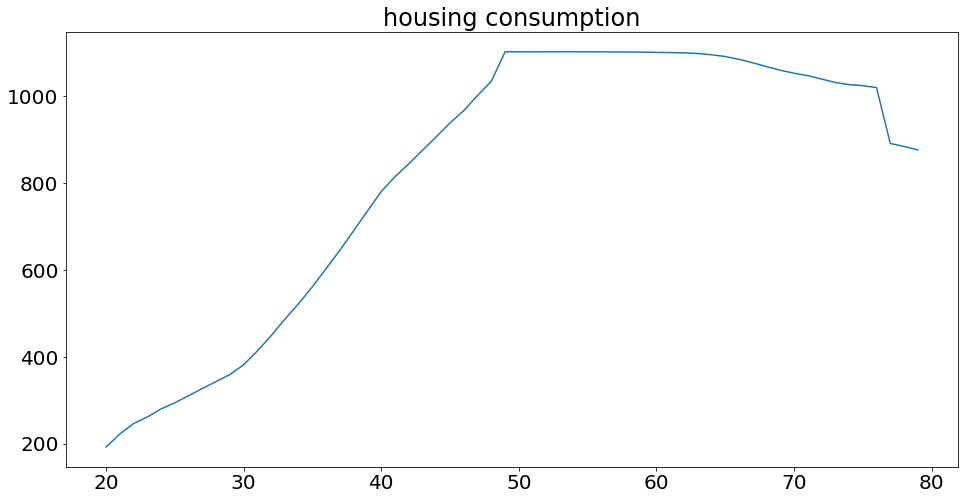

In [107]:
plt.title("housing consumption")
plt.plot(range(20, T_max + 20),(hs).mean(axis = 1), label = "housing")
plt.savefig("housingConsumption")

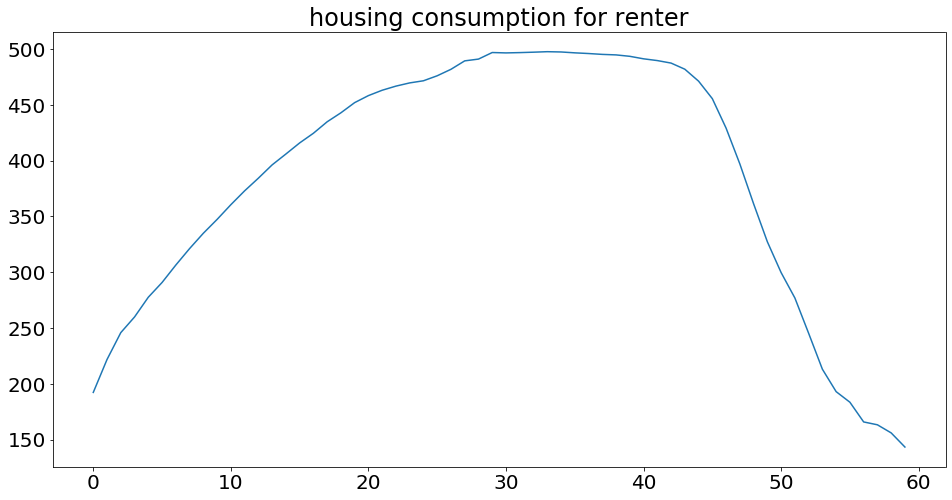

In [108]:
plt.title("housing consumption for renter")
plt.plot(hs[:, jnp.where(os.sum(axis = 0)  == 0)[0]].mean(axis = 1), label = "housing")
plt.savefig("housingConsumptionRenter")

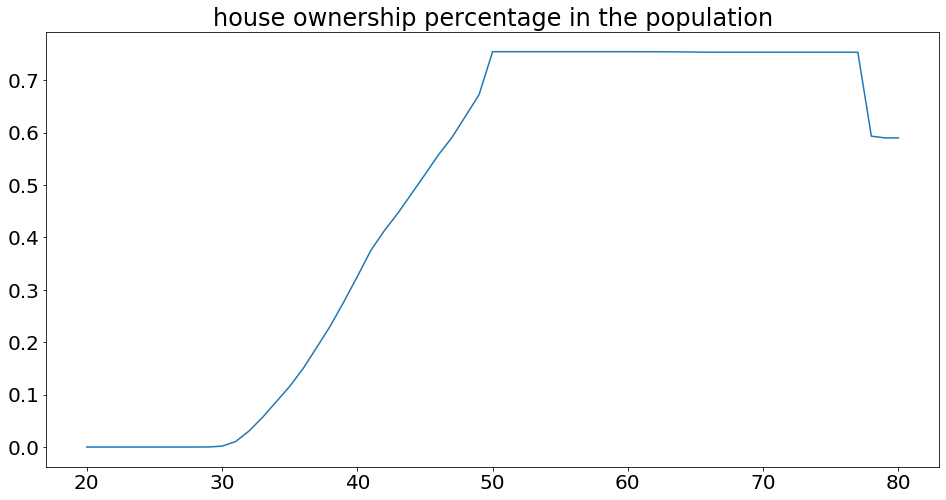

In [109]:
plt.title("house ownership percentage in the population")
plt.plot(range(20, T_max + 21),(os).mean(axis = 1), label = "owning")
plt.savefig("houseOwnership")

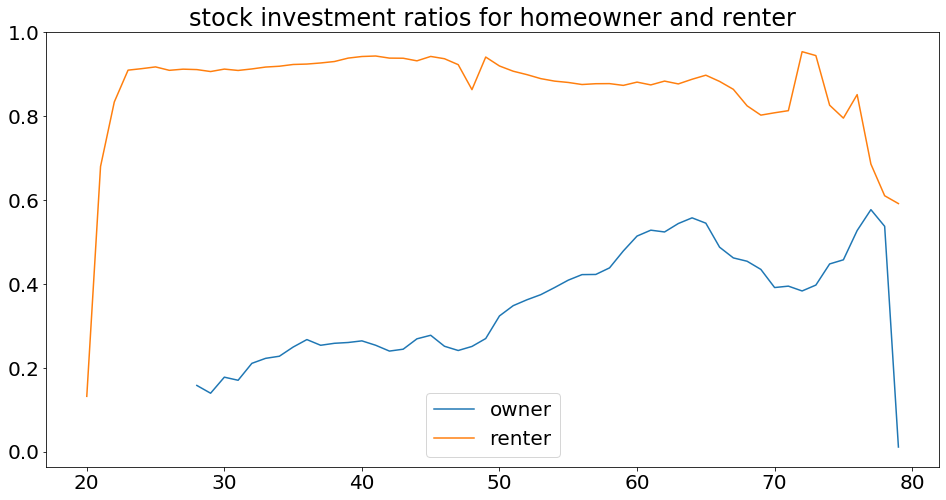

In [155]:
plt.title("stock investment ratios for homeowner and renter")
plt.plot(range(20,80), ((ks / (ks + bs))*os[1:]).sum(axis = 1)/os[1:].sum(axis =1), label = "owner")
plt.plot(range(20,80), ((ks / (ks + bs))*(1-os)[1:]).sum(axis = 1)/(1-os)[1:].sum(axis =1), label = "renter")
plt.legend()
plt.savefig("investmentRatioHomeownerRenter")

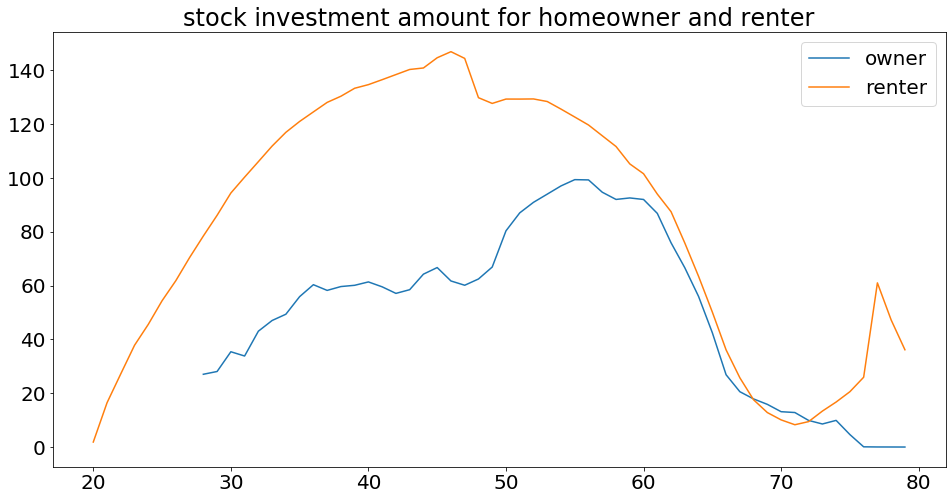

In [167]:
plt.title("stock investment amount for homeowner and renter")
plt.plot(range(20,80), (ks*os[1:]).sum(axis = 1)/os[1:].sum(axis =1), label = "owner")
plt.plot(range(20,80), (ks*(1-os)[1:]).sum(axis = 1)/(1-os)[1:].sum(axis =1), label = "renter")
plt.legend()
plt.savefig("investmentAmountOwnerRenter")

In [166]:
H

1000

In [63]:
# # agent number, x = [w,n,m,s,e,o]
# agentNum = 35
# plt.plot(range(20, T_max + 21),(ws + os*(H*pt - ms))[:,agentNum], label = "wealth + home equity")
# plt.plot(range(20, T_max + 21),ws[:,agentNum], label = "wealth")
# plt.plot(range(20, T_max + 21),ns[:,agentNum], label = "401k")
# plt.plot(range(20, T_max + 21),ms[:,agentNum], label = "mortgage")
# plt.plot(range(20, T_max + 20),cs[:,agentNum], label = "consumption")
# plt.plot(range(20, T_max + 20),bs[:,agentNum], label = "bond")
# plt.plot(range(20, T_max + 20),ks[:,agentNum], label = "stock")
# plt.plot(range(20, T_max + 21),os[:,agentNum]*100, label = "ownership", color = "k")
# plt.legend()

In [64]:
# import pandas as pd
# investmentRatio = np.zeros((nS, T_max))
# for age in range(0,T_max):
#     stockRatio = ks[age,:] / (ks[age,:] + bs[age,:])
#     state = ss[age,:]
#     list_of_tuples = list(zip(stockRatio, state)) 
#     df = pd.DataFrame(list_of_tuples,columns = ['stockRatio', "econState"]) 
#     investmentRatio[:,age] = df.groupby("econState").mean().values.flatten()
# plt.figure()
# for age in range(1,T_max-1, 10):
#     plt.plot(investmentRatio[:,age],label = str(age + 20))
# plt.legend()

In [65]:
# age = 50
# stockRatio = ks[age,:] / (ks[age,:] + bs[age,:])
# state = ss[age,:]
# own = os[age,:]
# list_of_tuples = list(zip(stockRatio, state, own)) 
# df = pd.DataFrame(list_of_tuples,columns = ['stockRatio', "econState", "own"]) 
# owner = df[df["own"] == 1]
# renter = df[df["own"] == 0]
# plt.plot(owner.groupby("econState")["stockRatio"].mean().values.flatten(), label = "Owner")
# plt.plot(renter.groupby("econState")["stockRatio"].mean().values.flatten(), label = "Renter")
# plt.legend()

In [153]:
(ks/(bs+ks)).mean(axis = 1).size

60

In [149]:
(ks/(bs+ks)).mean(axis = 1)[:20].mean()

DeviceArray(0.8122369, dtype=float32)

In [150]:
(ks/(bs+ks)).mean(axis = 1)[20:40].mean()

DeviceArray(0.54127747, dtype=float32)

In [151]:
(ks/(bs+ks)).mean(axis = 1)[40:].mean()

DeviceArray(0.5560905, dtype=float32)

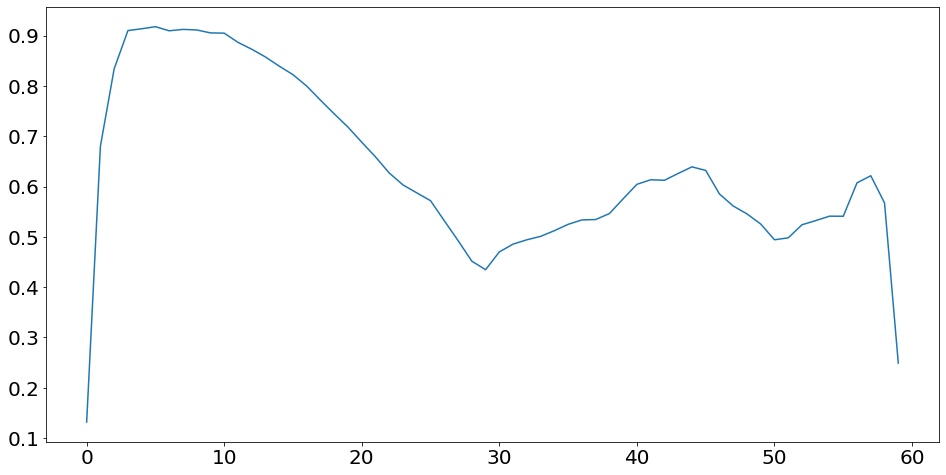

In [154]:
plt.plot((ks/(bs+ks)).mean(axis = 1))

In [141]:
pd.DataFrame(np.array([[20,40,60],[(ks/(bs+ks)).mean(axis = 1), ]]).T,columns=['age', 'number']).to_latex())

\begin{tabular}{lrr}
\toprule
{} &   age &    number \\
\midrule
0  &  20.0 &  0.131900 \\
1  &  21.0 &  0.680237 \\
2  &  22.0 &  0.834153 \\
3  &  23.0 &  0.910084 \\
4  &  24.0 &  0.913684 \\
5  &  25.0 &  0.917826 \\
6  &  26.0 &  0.909663 \\
7  &  27.0 &  0.912437 \\
8  &  28.0 &  0.911353 \\
9  &  29.0 &  0.905463 \\
10 &  30.0 &  0.904963 \\
11 &  31.0 &  0.886674 \\
12 &  32.0 &  0.873010 \\
13 &  33.0 &  0.857568 \\
14 &  34.0 &  0.839384 \\
15 &  35.0 &  0.822411 \\
16 &  36.0 &  0.799663 \\
17 &  37.0 &  0.771700 \\
18 &  38.0 &  0.744453 \\
19 &  39.0 &  0.718111 \\
20 &  40.0 &  0.688116 \\
21 &  41.0 &  0.658826 \\
22 &  42.0 &  0.626868 \\
23 &  43.0 &  0.603163 \\
24 &  44.0 &  0.587442 \\
25 &  45.0 &  0.571816 \\
26 &  46.0 &  0.532021 \\
27 &  47.0 &  0.492547 \\
28 &  48.0 &  0.451658 \\
29 &  49.0 &  0.434721 \\
30 &  50.0 &  0.470189 \\
31 &  51.0 &  0.485621 \\
32 &  52.0 &  0.494200 \\
33 &  53.0 &  0.501032 \\
34 &  54.0 &  0.512300 \\
35 &  55.0 &  0.524911 \\

In [156]:
# agent selling time collection
agentTime = []
for t in range(30):
    if ((os[t,:] == 0) & (os[t+1,:] == 1)).sum()>0:
        for agentNum in jnp.where((os[t,:] == 0) & (os[t+1,:] == 1))[0]:
            agentTime.append([t, agentNum])
agentTime = jnp.array(agentTime)
# agent selling time collection
agentHold = []
for t in range(30):
    if ((os[t,:] == 0) & (os[t+1,:] == 0)).sum()>0:
        for agentNum in jnp.where((os[t,:] == 0) & (os[t+1,:] == 0))[0]:
            agentHold.append([t, agentNum])
agentHold = jnp.array(agentHold)

FirstTimeBuyer 293.31973
HomeOwner 328.04834
Renter 136.3405


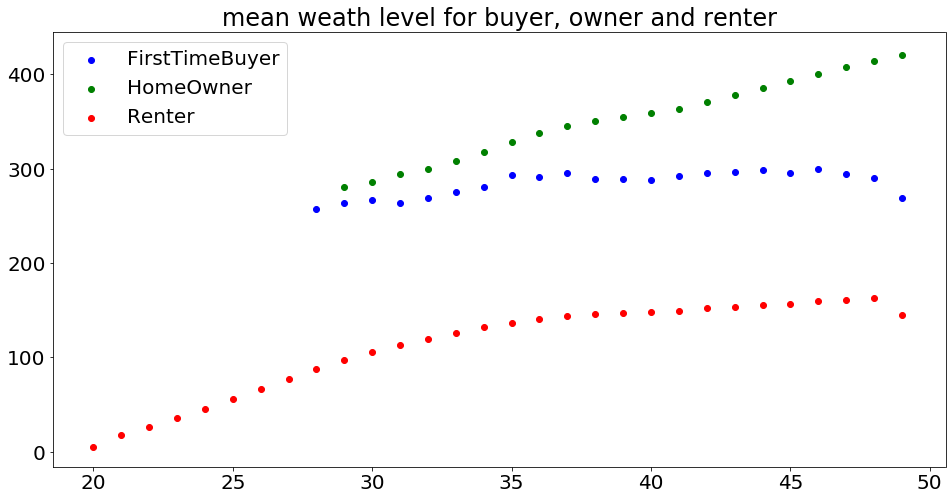

In [158]:
plt.title("mean weath level for buyer, owner and renter")
www = (os*(ws+H*pt - ms)).sum(axis = 1)/(os).sum(axis = 1)
for age in range(30):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    bp = plt.scatter(age+20, ws[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    hp = plt.scatter(age+20, www[age], color = "green")
    rp = plt.scatter(age+20, ws[renter[:,0], renter[:,1]].mean(),color =  "r")
    if(age+20 ==35):
        print("FirstTimeBuyer", ws[buyer[:,0], buyer[:,1]].mean())
        print("HomeOwner", www[age])
        print("Renter", ws[renter[:,0], renter[:,1]].mean())
plt.legend((bp,hp,rp), ("FirstTimeBuyer", "HomeOwner", "Renter"))
plt.savefig("wealthForBOR")

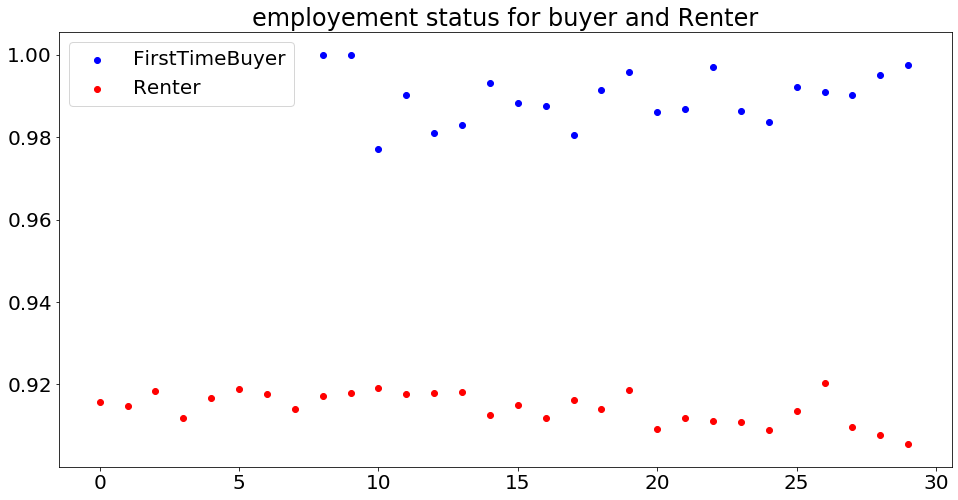

In [112]:
plt.title("employement status for buyer and Renter")
for age in range(31):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    bp = plt.scatter(age, es[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    rp = plt.scatter(age, es[renter[:,0], renter[:,1]].mean(),color =  "r")
plt.legend((bp, rp), ("FirstTimeBuyer", "Renter"))
plt.savefig("employForBAR")

In [113]:
# agent selling time collection
agentTime = []
for t in range(T_max):
    if ((zs[t,:] == 0) & (zs[t+1,:] == 1)).sum()>0:
        for agentNum in jnp.where((zs[t,:] == 0) & (zs[t+1,:] == 1))[0]:
            agentTime.append([t, agentNum])
agentTime = jnp.array(agentTime)
# agent selling time collection
agentHold = []
for t in range(T_max):
    if ((zs[t,:] == 0) & (zs[t+1,:] == 0)).sum()>0:
        for agentNum in jnp.where((zs[t,:] == 0) & (zs[t+1,:] == 0))[0]:
            agentHold.append([t, agentNum])
agentHold = jnp.array(agentHold)

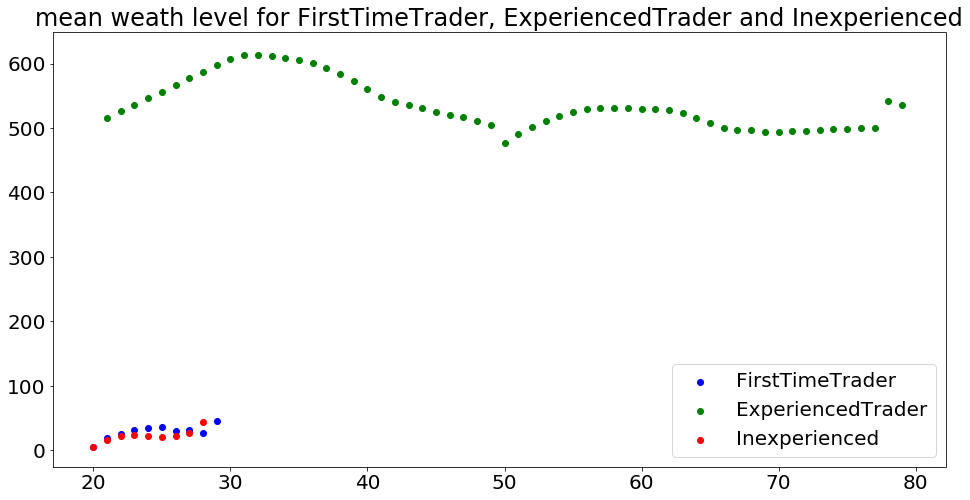

In [114]:
plt.title("mean weath level for FirstTimeTrader, ExperiencedTrader and Inexperienced")
www = (zs*(ws+H*pt - ms)).sum(axis = 1)/(zs).sum(axis = 1)
for age in range(T_max):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    bp = plt.scatter(age+20, ws[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    hp = plt.scatter(age+20, www[age], color = "green")
    rp = plt.scatter(age+20, ws[renter[:,0], renter[:,1]].mean(),color =  "r")
plt.legend((bp,hp,rp), ("FirstTimeTrader", "ExperiencedTrader", "Inexperienced"))
plt.savefig("wealthForFEI")

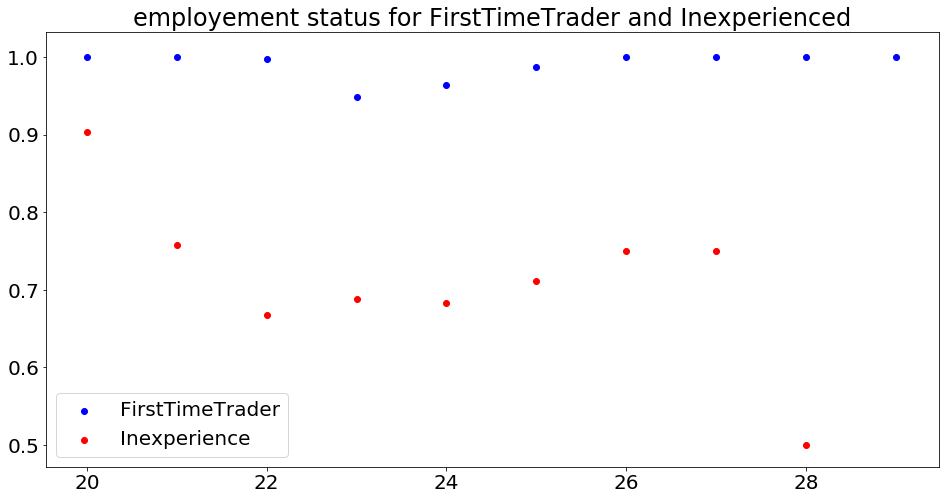

In [115]:
plt.title("employement status for FirstTimeTrader and Inexperienced")
for age in range(T_max):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    bp = plt.scatter(age+20, es[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    rp = plt.scatter(age+20, es[renter[:,0], renter[:,1]].mean(),color =  "r")
plt.legend((bp, rp), ("FirstTimeTrader", "Inexperience"))
plt.savefig("employForFI")